<a href="https://colab.research.google.com/github/kush2863/ml/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Comp\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
df = pd.read_csv('E:\LP1\\3\\Admission_Predict_Ver1.1.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

Drop " Serial No." no needed for classification

In [ ]:
df = df.drop('Serial No.',axis=1)

In [ ]:
df.shape

(500, 8)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df['Chance of Admit '] = [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [ ]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = df['Chance of Admit ']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_train {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (375, 7)
y_train (375,)
y_train (125, 7)
y_test (125,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [ ]:
model_dt = DecisionTreeRegressor(random_state=1)
model_rf = RandomForestRegressor(random_state=1)
model_lr = LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [ ]:
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [ ]:
y_pred_dt = model_dt.predict(x_test) #int
y_pred_rf = model_rf.predict(x_test) #float
y_pred_lr = model_lr.predict(x_test) #

In [ ]:
y_pred_rf = [1 if each > 0.75 else 0 for each in y_pred_rf]

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

# Decision Tree

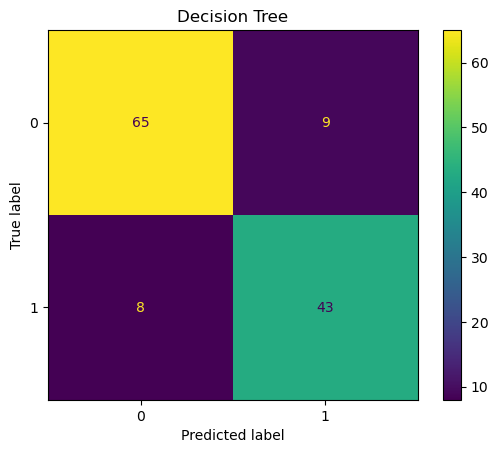

 Accuracy is 0.864
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.83      0.84      0.83        51

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.86      0.86      0.86       125



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.title('Decision Tree')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_dt)}")
print(classification_report(y_test,y_pred_dt))

# Logistic Regression

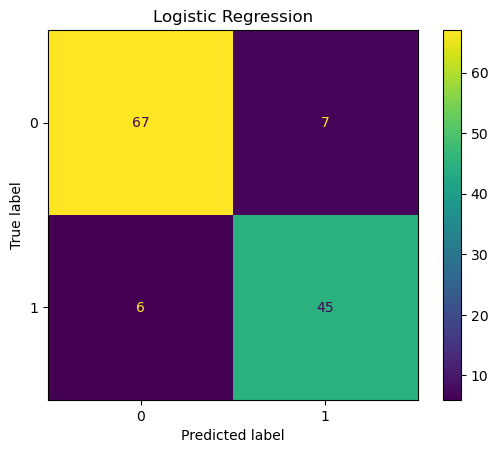

 Accuracy is 0.896
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        74
           1       0.87      0.88      0.87        51

    accuracy                           0.90       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.90      0.90      0.90       125



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic Regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

# Random Forest

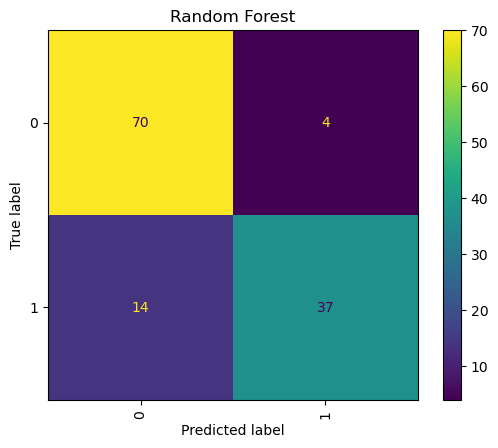

 Accuracy is 0.856
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        74
           1       0.90      0.73      0.80        51

    accuracy                           0.86       125
   macro avg       0.87      0.84      0.85       125
weighted avg       0.86      0.86      0.85       125



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf,xticks_rotation='vertical')
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))